### IMPORTING LIBRARIES AND DATA

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import rasterio
import os
from sklearn.model_selection import train_test_split

In [19]:
#DL LIBRARIES

import tensorflow as tf
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.metrics import Accuracy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [20]:
overview = pd.read_csv("overview.csv")

In [21]:
overview

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm
...,...,...,...,...,...,...,...,...
95,95,71,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,95,ID_0095_AGE_0071_CONTRAST_0_CT.tif,ID_0095_AGE_0071_CONTRAST_0_CT.dcm
96,96,83,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,96,ID_0096_AGE_0083_CONTRAST_0_CT.tif,ID_0096_AGE_0083_CONTRAST_0_CT.dcm
97,97,60,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,97,ID_0097_AGE_0060_CONTRAST_0_CT.tif,ID_0097_AGE_0060_CONTRAST_0_CT.dcm
98,98,61,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,98,ID_0098_AGE_0061_CONTRAST_0_CT.tif,ID_0098_AGE_0061_CONTRAST_0_CT.dcm


In [22]:
overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      100 non-null    int64 
 1   Age             100 non-null    int64 
 2   Contrast        100 non-null    bool  
 3   ContrastTag     98 non-null     object
 4   raw_input_path  100 non-null    object
 5   id              100 non-null    int64 
 6   tiff_name       100 non-null    object
 7   dicom_name      100 non-null    object
dtypes: bool(1), int64(3), object(4)
memory usage: 5.7+ KB


### DESCRIPTIVE DATA ANALYSIS

We will be doing some basic analysis where we try to understand the dataset and other relevant information about it

we will be doing the following
* distribution of the age
* distribution of the classes
* an image distribution of the dataset

Text(0.5, 1.0, 'Distribution of CT image age')

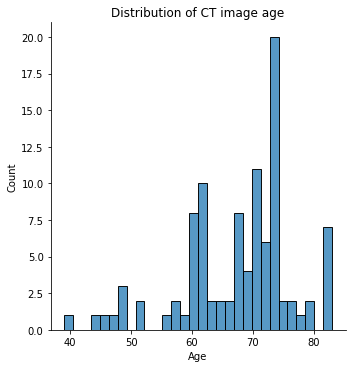

In [23]:
sns.displot(overview["Age"], bins=30)
plt.title("Distribution of CT image age")

In [24]:
labels = []

for file in os.listdir("tiff_images/"):
    labels.append(int(file.split("_")[-2]))

named_labels = []
for x in labels:
    if x == 1:
        named_labels.append("Positive")
    else:
        named_labels.append("Negative")

Text(0.5, 1.0, 'How the labels are separated for 100 selected images')

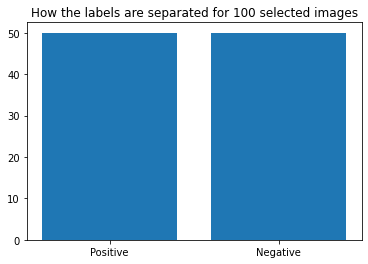

In [25]:
named_labels.count("Positive")

plt.bar(x=["Positive", "Negative"], height=[named_labels.count("Positive"), named_labels.count("Negative")])
plt.title("How the labels are separated for 100 selected images")

In [26]:
import pydicom

parts = []

for f in os.listdir("dicom_dir/"):
    parts.append(pydicom.read_file("dicom_dir/" + f).BodyPartExamined)

Text(0.5, 1.0, 'Which Body Parts was examined?')

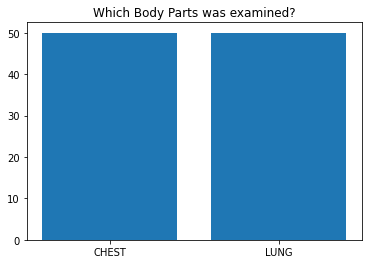

In [27]:
plt.bar(["CHEST", "LUNG"], [parts.count("CHEST"), parts.count("LUNG")])
plt.title("Which Body Parts was examined?")

In [28]:
X = []
#collecting the file name and reading the image files using rasterio
for path in overview["tiff_name"]:
    with rasterio.open(f"tiff_images/{path}") as img:
        arr = img.read()
        arr = arr.reshape((512, 512, 1))
        arr = np.array(arr) / 255
        X.append(arr)

X = np.array(X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


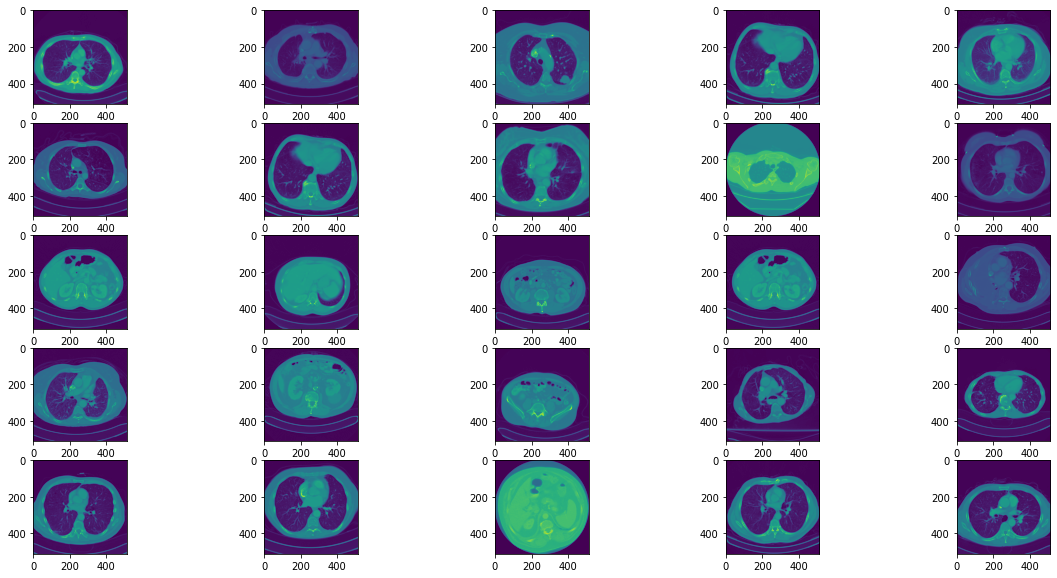

<Figure size 432x288 with 0 Axes>

In [29]:
#plotting of 25 images of CT scans
plt.figure(figsize=(20, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i])
plt.show()
plt.tight_layout()

In [30]:
n_labels = np.array(labels)

n_labels.shape

(100,)

In [31]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.3, 1.3]
)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, n_labels, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(80, 512, 512, 1)

## MODEL ARCHITECTURE DEFINITIONS

In [34]:
model = Sequential()
model.add(Conv2D(64, (4, 4), activation = "relu", input_shape = X_train.shape[1:]))
model.add(Conv2D(64, (4, 4), activation = "relu"))
model.add(MaxPooling2D())  #finds the maximun in a matrix and returns it. returns a smaller matrix
model.add(Dropout(0.2)) #randomly removes some part of the data to avoid overfitting
model.add(Conv2D(32, (4, 4), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten()) #turns the mxn matrix into a m*n list
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 509, 509, 64)      1088      
                                                                 
 conv2d_1 (Conv2D)           (None, 506, 506, 64)      65600     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 253, 253, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 253, 253, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 32)      32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                  

In [35]:
model.compile(loss = "binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=Accuracy())
#training of the model
history = model.fit(
    X_train,  y_train,
    epochs=20,
    validation_data=(X_test, y_test)
    )

Epoch 1/20
3/3 [==============================] - 7487s 3665s/step - loss: 120.7133 - accuracy: 0.1250 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 8319s 3257s/step - loss: 0.6961 - accuracy: 0.0000e+00 - val_loss: 0.6926 - val_accuracy: 0.0000e+00
Epoch 3/20
3/3 [==============================] - 300s 89s/step - loss: 0.6869 - accuracy: 0.0000e+00 - val_loss: 0.6919 - val_accuracy: 0.0000e+00
Epoch 4/20
3/3 [==============================] - 308s 95s/step - loss: 0.6776 - accuracy: 0.0000e+00 - val_loss: 0.6921 - val_accuracy: 0.0000e+00
Epoch 5/20
3/3 [==============================] - 22582s 101s/step - loss: 0.6581 - accuracy: 0.0000e+00 - val_loss: 0.6930 - val_accuracy: 0.0000e+00
Epoch 6/20
3/3 [==============================] - 365s 100s/step - loss: 0.6254 - accuracy: 0.0000e+00 - val_loss: 0.7026 - val_accuracy: 0.0000e+00
Epoch 7/20
3/3 [==============================] - 318s 95s/step - loss: 0.5922 - accuracy: 0.0000e+00 - 

In [36]:
#SAVING THE MODEL INTO A KERAS HDF5 OBJECT FILE

model.save("model.h5")

### PLOTTING OF LOSS AND MEAN SQUARED ERROR

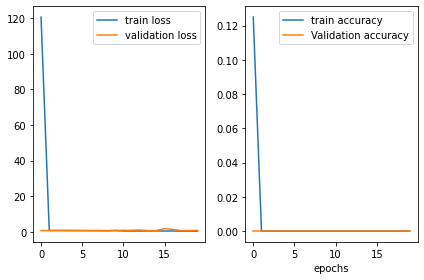

In [37]:
plt.subplot(1,2,1)
plt.plot(list(range(20)), history.history['loss'], label="train loss")
plt.plot(list(range(20)), history.history['val_loss'], label="validation loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(list(range(20)), history.history["accuracy"], label="train accuracy")
plt.plot(list(range(20)), history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("epochs")
plt.legend()
plt.tight_layout()
